<a href="https://colab.research.google.com/github/beifa/ML-models/blob/master/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import numpy as np 
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.linear_model import LogisticRegression
from scipy import optimize
from sklearn.preprocessing import PolynomialFeatures
from sklearn.multiclass import OneVsRestClassifier

In [0]:
data = load_wine()
y = data.target
X = data.data #(178, 13)

class:

- class_0
- class_1
- class_2

Leave only 0 and 1

In [0]:
X = X[y <= 1] #(130,13)
y = y[y <= 1]

In [0]:
#only two features
X = X[:, [6, 9]]

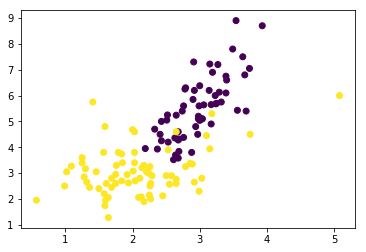

In [0]:
#plottyyy
plt.scatter(X[:, 0], X[:, 1], c = y)

### Sigmoid, cost and minimize


$$ h_\theta(x) = g(\theta^T x)$$

where function $g$ is the sigmoid function. 

$$g(z) = \frac{1}{1+e^{-z}}$$.

In [0]:
def sigmoid(z):
    """
    Compute sigmoid function        
    Returns
    -------
    The computed sigmoid function.
    """
    return 1 / (1 + np.exp(-z))

In [0]:
def cost(theta, X, y):
    """
    Compute cost and gradient for logistic regression. 
    
    Param
    -----
    theta : array_like
        The parameters for logistic regression. This a vector
        of shape (n+1, ).
    
    X, y: data, we need add intercept
    
    Returns:
           J - cost
           grad - array, grad cost
    """
    m = y.size 
    grad = np.zeros(theta.shape)
    h = sigmoid(np.dot(X, theta.T))    
    J = 1/X.shape[0] * np.sum(np.dot(-y, np.log(h)) - np.dot(1-y, np.log(1-h)))    
    hy = h-y
    for j in range(n+1):
      p = 1/m * np.dot((hy), X[:, j])
      grad[j] = p
    return J, grad

In [0]:
def minimize(func, initial_theta, X, y):  
  res = optimize.minimize(func,initial_theta, (X, y), jac=True, method='TNC')  
  #return cost and theta
  return res.fun, res.x

In [0]:
def predict(X, theta):
  #predict
  return np.round(sigmoid(np.dot(X, theta)))

In [0]:
def we_need_plot(X,y,theta):  
  plot_x = np.array([np.min(X[:, 1]) - 2, np.max(X[:, 1]) + 2])
  plot_y = (-1. / theta[2]) * (theta[1] * plot_x + theta[0])
  plt.plot(plot_x, plot_y)
  plt.scatter(X[:, 1], X[:, 2], c = y)
  plt.xlabel('Flavanoids')
  plt.ylabel('color_intensity')
  plt.title('Visualization how a line divides two classes')

In [0]:
#plot
# slope = -(grad[1] / grad[2])
# intercept = -(grad[0] / grad[2])
# y_plot = intercept + (slope * x_plot)  

In [0]:
#add intercept !!!
m, n = X.shape
X = np.concatenate([np.ones((m, 1)), X], axis=1)

In [0]:
theta = np.zeros(X.shape[1])
J, grad = cost(theta, X, y)

In [0]:
print('Cost & grad without minim :', J, grad)

Cost & grad without minim : 0.6931471805599454 [-0.04615385  0.10853846  0.41161538]


In [0]:
initial_theta = np.zeros(X.shape[1])
cost, theta = minimize(cost, initial_theta, X, y)

Cost func: 0.29120224907374215
Theta : [ 9.72923271 -0.89537015 -1.75780184]


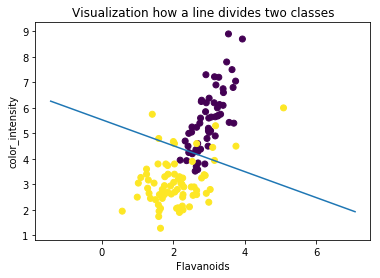

In [0]:
print('Cost func:', cost)
print('Theta :', theta)
we_need_plot(X, y, theta)

In [0]:
score = float(np.sum(predict(X, theta) == y))/ float(len(y))
print(score)

0.8538461538461538


#### Check

In [0]:
log = LogisticRegression(solver='lbfgs').fit(X, y)
log.score(X, y)

0.8615384615384616

### Cost function and gradient with regularized

Regularized cost function in logistic regression is

$$ J(\theta) = \frac{1}{m} \sum_{i=1}^m \left[ -y^{(i)}\log \left( h_\theta \left(x^{(i)} \right) \right) - \left( 1 - y^{(i)} \right) \log \left( 1 - h_\theta \left( x^{(i)} \right) \right) \right] + \frac{\lambda}{2m} \sum_{j=1}^n \theta_j^2 $$

Note that you should not regularize the parameters $\theta_0$. The gradient of the cost function is a vector where the $j^{th}$ element is defined as follows:

$$ \frac{\partial J(\theta)}{\partial \theta_0} = \frac{1}{m} \sum_{i=1}^m \left( h_\theta \left(x^{(i)}\right) - y^{(i)} \right) x_j^{(i)} \qquad \text{for } j =0 $$

$$ \frac{\partial J(\theta)}{\partial \theta_j} = \left( \frac{1}{m} \sum_{i=1}^m \left( h_\theta \left(x^{(i)}\right) - y^{(i)} \right) x_j^{(i)} \right) + \frac{\lambda}{m}\theta_j \qquad \text{for } j \ge 1 $$


In [0]:
def costLog(theta, X, y, lambda_):    
    m = y.size
    n = X.shape[1]   
    grad = np.zeros(theta.shape)
    h = sigmoid(np.dot(X, theta.T))
    J = 1/X.shape[0] * np.sum(np.dot(-y, np.log(h)) - np.dot(1-y, np.log(1-h)))
    reg = lambda_ / (2*m) * np.sum(theta[1:]**2)
    J = J + reg     
    grad[0] = 1/m * np.dot(X[:, 0].T, h - y)
    grad[1:] = 1/m * np.dot(X[:,1:].T, h - y) + ((lambda_/ m)* theta[1:])
    return J, grad

In [0]:
m, n = X.shape
lambda_ = 1
initial_theta = np.zeros(X.shape[1])
cost, grad = costLog(initial_theta, X, y, lambda_)

### Using scipy.optimize
-find the best parameters  θ  for the logistic regression cost function


Для логистической регрессии вы хотите оптимизировать функцию затрат J (θ) с параметрами θ. Конкретно, вы собираетесь использовать optimize.minimize, чтобы найти лучшие параметры θ для функции стоимости логистической регрессии, учитывая фиксированный набор данных (значений X и y).

Вы перейдете к optimize.minizes следующих входных данных:

**costFunction**:функция стоимости, которая при задании обучающего набора и определенного θ вычисляет стоимость и градиент логистической регрессии относительно θ для набора данных (X, y). Важно отметить, что мы передаем только имя функции без скобок. Это указывает на то, что мы предоставляем только ссылку на эту функцию, а не оцениваем результат этой функции.

**initial_theta**:начальные значения параметров, которые мы пытаемся оптимизировать.

**(X, y)**: это дополнительные аргументы для функции стоимости.

**jac**: Указывает, возвращает ли функция стоимости якобиан (градиент) вместе со значением стоимости. (Правда)

**Метод**: метод оптимизации / алгоритм для использования параметры: дополнительные параметры, которые могут быть специфическими для конкретного метода оптимизации. 

optimize.minimize: вам нужно только предоставить функцию, вычисляющую стоимость и градиент.

In [0]:
initial_theta = np.zeros(X.shape[1])
lambda_ = 1
res = optimize.minimize(costLog,initial_theta,(X, y, lambda_),jac=True, method='TNC')
cost = res.fun
theta = res.x

Cost func: 0.30467171611250726
Lambda:  1


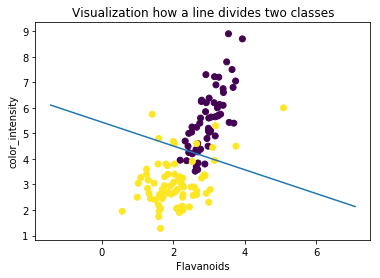

In [0]:
print('Cost func:', cost)
print('Lambda: ', lambda_)
we_need_plot(X, y, theta)

In [0]:
score = float(np.sum(predict(X, theta) == y))/ float(len(y))
print(score)

0.8615384615384616


Регуляризация НЕ улучшает производительность набора данных, который алгоритм использовал для изучения параметров модели (весов характеристик). ... Говоря более конкретно, мы можем думать о регуляризации как о добавлении (или увеличении) смещения, если наша модель страдает от (высокой) дисперсии (то есть она перекрывает обучающие данные).

In [0]:
initial_theta = np.zeros(X.shape[1])
lambda_ = 500
res = optimize.minimize(costLog,initial_theta,(X, y, lambda_),jac=True, method='BFGS')
cost = res.fun
theta = res.x

Cost func: 0.6433252182831999
Lambda:  500


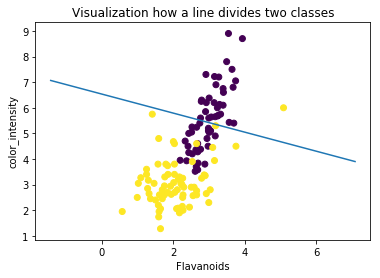

In [0]:
print('Cost func:', cost)
print('Lambda: ', lambda_)
we_need_plot(X, y, theta)

In [0]:
score = float(np.sum(predict(X, theta) == y))/ float(len(y))
print(score)

0.7692307692307693


#### Check

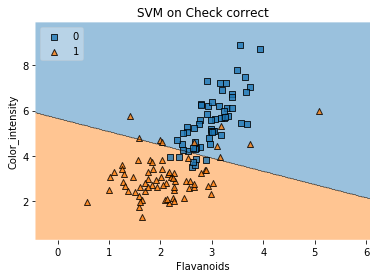

In [0]:
from mlxtend.plotting import plot_decision_regions
from sklearn import datasets
from sklearn.svm import SVC

# Training a classifier
svm = SVC(C=0.5, kernel='linear')
svm.fit(X, y)
# Plotting decision regions

plot_decision_regions(X, y, clf=svm, legend=2)

# Adding axes annotations
plt.xlabel('Flavanoids')
plt.ylabel('Color_intensity')
plt.title('SVM on Check correct');

In [0]:
#http://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/

### Its Poly

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
path = '/content/gdrive/My Drive/for_GitHub/poly_data.txt'
data = np.loadtxt(path, delimiter=',')
X, y = data[:, 0:2], data[:, 2]

In [0]:
#or
# data = np.loadtxt('/data/poly_data.txt', delimiter=',')
# X, y = data[:, 0:2], data[:, 2]


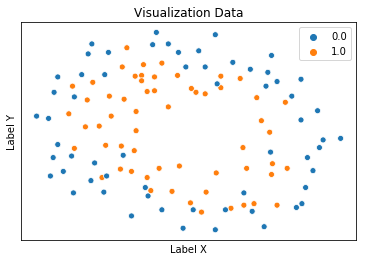

In [0]:
sns.scatterplot(X[:, 0], X[:, 1], hue = y)
plt.xlabel('Label X')
plt.ylabel('Label Y')
plt.xticks(())
plt.yticks(())
plt.title('Visualization Data');

Let’s try to use the Logistic Regression and see how it will work with new data,running ahead of you can say that there is no line here, the accuracy of such a model is 0.55

In [0]:
#add intercept !!!
m, n = X.shape
X = np.concatenate([np.ones((m, 1)), X], axis=1)

In [0]:
theta = np.zeros(X.shape[1])
J, grad = cost(theta, X, y)

In [0]:
initial_theta = np.zeros(X.shape[1])
cost, theta = minimize(cost, initial_theta, X, y)

In [0]:
# Same change 
def we_need_plot_log(X,y,theta):
  plot_x = np.array([np.min(X[:, 1]), np.max(X[:, 1])])  
  plot_y = (-1. / theta[2]) * (theta[1] * plot_x + theta[0])
  plt.plot(plot_x, plot_y)
  plt.scatter(X[:, 1], X[:, 2], c = y)
  plt.ylim((-1.5,1.5))
  plt.xlabel('Label X')
  plt.ylabel('Label Y')
  plt.title('Visualization how work Logistic Regression')

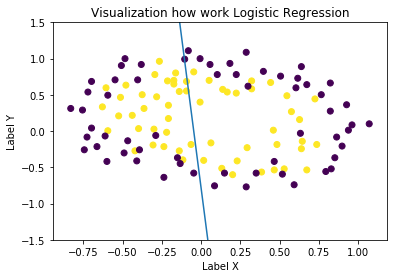

In [0]:
we_need_plot_log(X, y, theta)

In [0]:
score = float(np.sum(predict(X, theta) == y))/ float(len(y))
print(score)

In [0]:
def make_poly(X1, X2, degree=4):
    """
    Make poly
    X1, X2, X1.^2, X2.^2, X1*X2, X1*X2.^2,...
    Parameters
    ----------
    X1 : feature one col
    X2 : feature second col
    degree: The polynomial degree.
    Returns: array, more poly features    
    """
    if X1.ndim > 0:
        out = [np.ones(X1.shape[0])]
    else:
        out = [np.ones(1)]

    for i in range(1, degree + 1):
        for j in range(i + 1):
            out.append((X1 ** (i - j)) * (X2 ** j))

    if X1.ndim > 0:
        return np.stack(out, axis=1)
    else:
        return np.array(out)

In [0]:
X_poly = make_poly(X[:, 1], X[:, 2])

In [0]:
X_poly.shape # 3 --> 15 jamp 12 new features

(118, 15)

In [0]:
lambda_ = 1
initial_theta = np.zeros(X_poly.shape[1])
cost, grad = costLog(initial_theta, X_poly, y, lambda_)

In [0]:
lambda_ = 1
res = optimize.minimize(costLog,initial_theta,(X_poly, y, lambda_),jac=True, method='TNC')
cost = res.fun
theta = res.x

after adding 12 new features, we saw that accuracy increased from .5 to .8

In [0]:
score = float(np.sum(predict(X_poly, theta) == y))/ float(len(y))
print(score)

0.8220338983050848


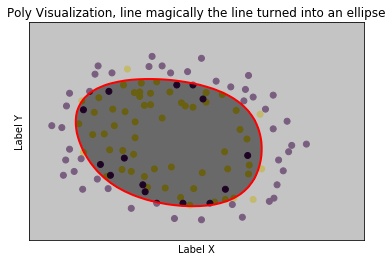

In [0]:
def plot_poly_boundary(theta, X, y, Z):
    """
    Plots the data poly

    Param:
    ------    
    X : array_like, N>3 matrix, where the first column is all ones, poly
    Z : original data X not poly for plot data
    """
    #plot data
    plt.scatter(Z[:, 1], Z[:, 2], c = y)
    plt.xlabel('Label X')
    plt.ylabel('Label Y')


    # Here is the grid range
    u = np.linspace(-1, 1.5, 50)
    v = np.linspace(-1, 1.5, 50)
    z = np.zeros((u.size, v.size))
    # Evaluate z = theta*x over the grid
    for i, ui in enumerate(u):
      for j, vj in enumerate(v):
        z[i, j] = np.dot(make_poly(ui, vj), theta)
    z = z.T  
    # print(z)
    plt.contour(u, v, z, levels=[0], linewidths=2, colors='r')
    plt.contourf(u, v, z, levels=[np.min(z), 0, np.max(z)], cmap='Greys', alpha=0.6)
    plt.xticks(())
    plt.yticks(())
    plt.title('Poly Visualization, line magically the line turned into an ellipse');


plot_poly_boundary(theta, X_poly, y, X)

#### Check

In [0]:
log = LogisticRegression(solver='lbfgs').fit(X_poly, y)
log.score(X_poly, y)

0.8220338983050848

### Vectorize

In [0]:
def cost(theta, X, y, lambda_):
  m = y.size
  #theta = np.zeros(X.shape[1])
  h = sigmoid(np.dot(X, theta))
  J = 1/m * (-np.log(h).dot(y) - (1-y).dot(np.log(1-h))) + (lambda_ /(2*m) * np.sum(theta[1:]**2)) 
  return J

def gradient(theta, X, y,  lambda_,):  
  m = y.size
  h = sigmoid(np.dot(X, theta))  
  t = 1/m * (h-y).dot(X)   
  theta[0] = 0  
  g = 1/m * (h-y).dot(X) + (lambda_/m * theta)  
  return g


### One vs All

Given a classification problem with N possible solutions, a one-vs.-all solution consists of N separate binary classifiers—one binary classifier for each possible outcome. For example, given a model that classifies examples as animal, vegetable, or mineral, a one-vs.-all solution would provide the following three separate binary classifiers:

- animal vs. not animal
- vegetable vs. not vegetable
- mineral vs. not mineral

In [0]:
data = load_wine()
y = data.target
X = data.data #(178, 13)

In [0]:
#only two features
X = X[:, [6, 9]]

In [0]:
m, n = X.shape 
X = np.concatenate([np.ones((m, 1)), X], axis=1)

In [0]:
def oneVsall(X, y, num_labels, lambda_):
    """
    Trains num_labels logistic regression classifiers     
    Param:
    ------
    X, y: data    
    lambda_ : regularization    
    Returns: theta 
    """
    m, n = X.shape   
    all_theta = np.zeros((num_labels, n))    
    initial_theta = np.zeros(n)    
    #X = np.concatenate([np.ones((m, 1)), X], axis=1)    
    for c in range(0, num_labels):       
      res = optimize.minimize(cost,initial_theta,(X, (y == c ).astype(int), lambda_),jac=gradient,method='BFGS')    
      all_theta[c,:] = res.x 
      print('Class: {0} | Cost: {1}'.format(c, res.fun))
    return all_theta

In [9]:
"""
Стоимость для каждого класса и значения теты
"""
oneVsall(X, y, 3, 1)

Class: 0 | Cost: 0.316464183771179
Class: 1 | Cost: 0.2568904702918792
Class: 2 | Cost: 0.08106735841872642


array([[-8.60128235,  2.56796087,  0.40599151],
       [ 7.57611886,  0.35802604, -2.03767746],
       [-2.11423075, -3.15106245,  1.23272074]])

In [0]:
def predict_oneVsall(all_theta, X):
    """
    Return a vector of predictions for each example in the matrix X.    
    """
    m = X.shape[0]    
    # Add ones to the X data matrix
    #X = np.concatenate([np.ones((m, 1)), X], axis=1)
    return np.argmax(sigmoid(X.dot(all_theta.T)), axis=1)

In [37]:
#Score for all
all_theta = oneVsall(X, y, 3, 1)
pred = predict_oneVsall(all_theta, X)
print('Training Set Accuracy: {:.2f}%'.format(np.mean(pred == y.ravel()) * 100))

Class: 0 | Cost: 0.316464183771179
Class: 1 | Cost: 0.2568904702918792
Class: 2 | Cost: 0.08106735841872642
Training Set Accuracy: 89.89%


In [119]:
#точьность каждого класса в отдельности по сравнению с другими
def predict(X, theta):
  #predict
  return np.round(sigmoid(np.dot(X, theta)))

scores = []
for i in range(len(all_theta)):
  score = float(np.sum(predict(X, all_theta[i]) == y))/ float(len(y))
  scores.append(score)
  print(score)

0.12921348314606743
0.6404494382022472
0.33707865168539325


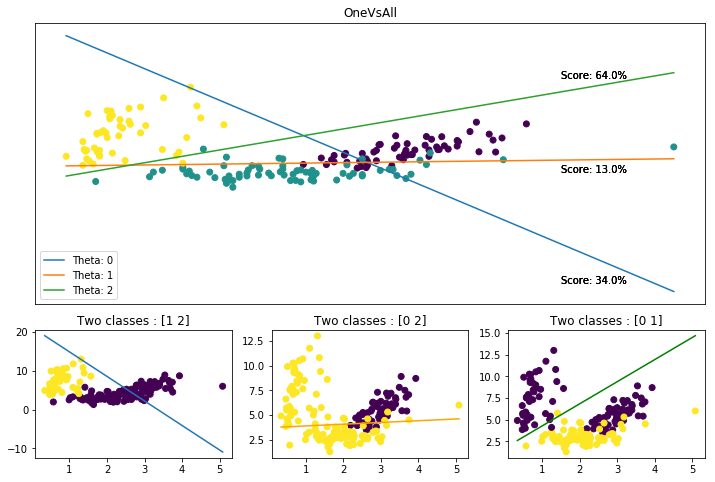

In [134]:
gridsize = (3, 3)
fig = plt.figure(figsize=(12, 8))
ax1 = plt.subplot2grid(gridsize, (0, 0), colspan=3, rowspan=2)
ax2 = plt.subplot2grid(gridsize, (2, 0))
ax3 = plt.subplot2grid(gridsize, (2, 1))
ax4 = plt.subplot2grid(gridsize, (2, 2))

#__________plot__________
ax1.scatter(X[:, 1], X[:, 2], c = y)
plot_x = np.array([np.min(X[:, 1]), np.max(X[:, 1])])
for i in range(len(all_theta)):
  theta = all_theta[i]
  plot_y = (-1. / theta[2]) * (theta[1] * plot_x + theta[0])
  ax1.plot(plot_x, plot_y, label = 'Theta: ' + str(i) )
  #Scores
  ax1.text(x =4.2, y =3, s = 'Score: {}%'.format(np.round(scores[0], 2) * 100))
  ax1.text(x =4.2, y =14, s = 'Score: {}%'.format(np.round(scores[1], 2) * 100))
  ax1.text(x =4.2, y =-10, s = 'Score: {}%'.format(np.round(scores[2], 2) * 100))
  ax1.legend()
  #  plot line for small figure
  if i == 0:
    yy = np.where(y != i, y, 1) #conver two class
    ax2.scatter(X[:, 1], X[:, 2], c = yy)
    plot_y = (-1. / theta[2]) * (theta[1] * plot_x + theta[0])
    ax2.plot(plot_x, plot_y)
    ax2.set_title('Two classes : ' + str(np.unique(yy)))
  elif i == 1:
    yy = np.where(y != i, y, 2) 
    ax3.scatter(X[:, 1], X[:, 2], c = yy)
    plot_y = (-1. / theta[2]) * (theta[1] * plot_x + theta[0])
    ax3.plot(plot_x, plot_y, c = 'orange')
    ax3.set_title('Two classes : ' + str(np.unique(yy))) 
  else:
    yy = np.where(y != i, y, 0)
    ax4.scatter(X[:, 1], X[:, 2], c = yy)
    plot_y = (-1. / theta[2]) * (theta[1] * plot_x + theta[0])
    ax4.plot(plot_x, plot_y, c = 'g')  
    ax4.set_title('Two classes : ' + str(np.unique(yy)))   
ax1.set_xticks(())
ax1.set_yticks(())
ax1.set_title('OneVsAll');

#### Check

In [137]:
clf = OneVsRestClassifier(LogisticRegression(solver='lbfgs')).fit(X,y)
clf.score(X, y)

0.898876404494382